# Task 1: Term Deposit Subscription Prediction (Bank Marketing)

## 1. Problem Statement

Banks often run direct marketing campaigns (phone calls, emails, messages) to convince customers to subscribe to financial products like term deposits. However, contacting every customer is costly and inefficient. Many customers are not interested, which wastes marketing resources.

The challenge is to use historical marketing campaign data to predict whether a customer will subscribe to a term deposit. A reliable prediction model can help banks target only high-probability customers and improve campaign efficiency.

## 2. Objective

The objective of this project is to build a machine learning classification model that predicts whether a bank customer will subscribe to a term deposit based on demographic, financial, and campaign-related features.

Key goals:

Explore and understand the Bank Marketing dataset

Perform data cleaning and preprocessing

Encode categorical variables properly

Train multiple classification models (Logistic Regression and Random Forest)

Evaluate model performance using Confusion Matrix, F1-score, and ROC curve

Use SHAP to explain model predictions and interpret feature importance

## 3. Dataset Description

The dataset used in this task is the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains information about direct marketing campaigns conducted by a Portuguese banking institution.

Features include:

Client data: age, job, marital status, education

Financial attributes: balance, housing loan, personal loan

Campaign details: contact type, month, duration, previous outcomes

Target Variable:

y → Whether the client subscribed to a term deposit

yes = subscribed

no = not subscribed

## 4. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Explainable AI
import shap

## 5. Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/Aqsaamalik/Desktop/DataScience&AnalystInternship/bank/bank-full.csv",sep=';')

# View first rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 6. Exploratory Data Analysis (EDA)
#### Target Distribution

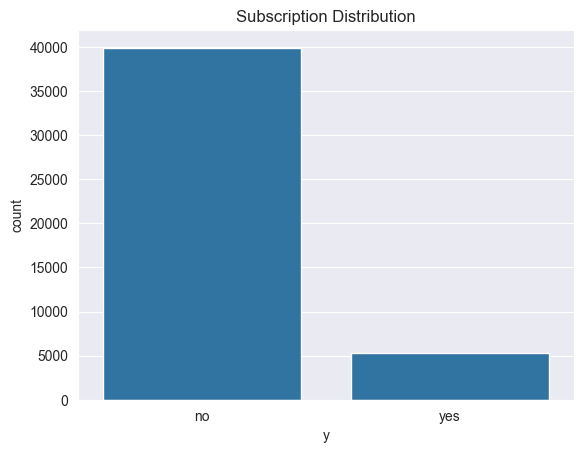

In [6]:
sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")
plt.show()

#### Age Distribution

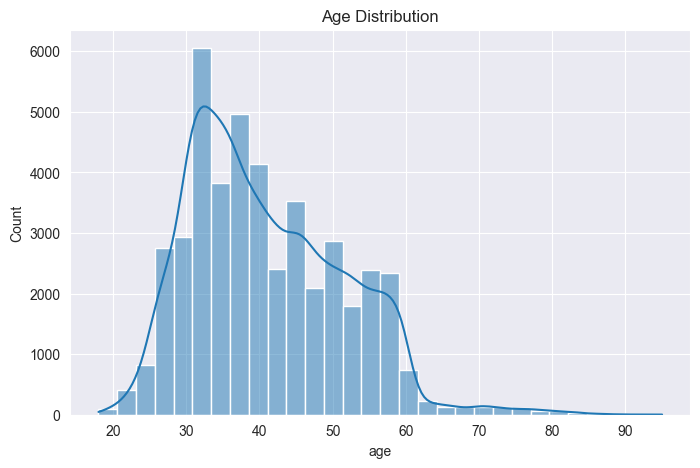

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#### Job vs Subscription

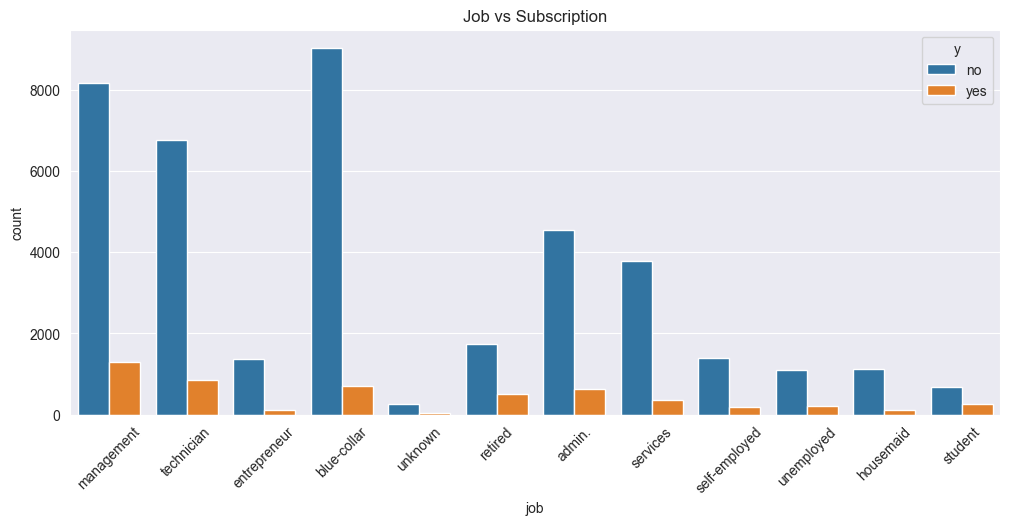

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()

## 7. Data Preprocessing
#### Check Missing Values

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Encode Target Variable

In [9]:
# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

#### Encode Categorical Features

In [10]:
# Label encoding for categorical columns
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

## 8. Train-Test Split

In [11]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 9. Model 1: Logistic Regression

In [12]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

#### Evaluation

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.86      9043



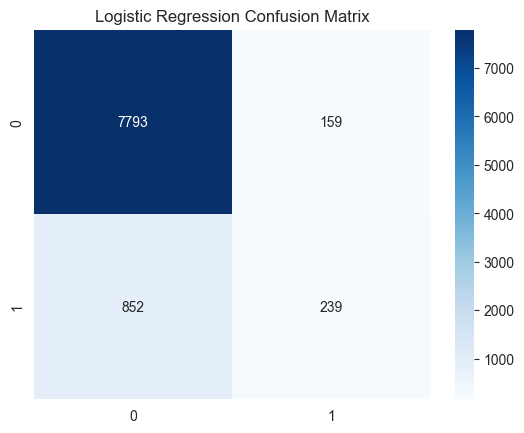

Logistic Regression F1 Score: 0.3210208193418402


In [14]:
# Classification report (precision, recall, F1)
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Explicit F1 Score
from sklearn.metrics import f1_score
f1_log = f1_score(y_test, y_pred_log)
print("Logistic Regression F1 Score:", f1_log)

## 10. Model 2: Random Forest

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

#### Evaluation

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



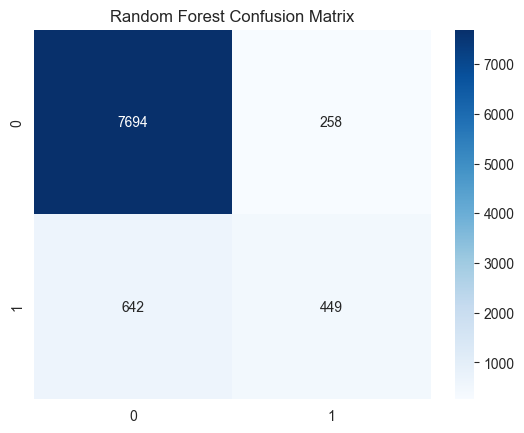

Random Forest F1 Score: 0.4994438264738598


In [16]:
# Classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Explicit F1 Score
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest F1 Score:", f1_rf)

## 11. ROC Curve Comparison

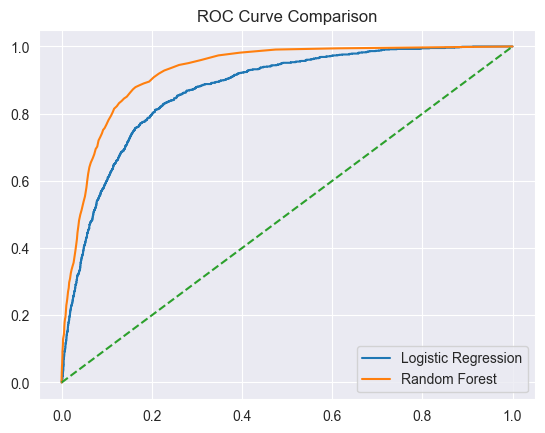

In [17]:
# Logistic regression probabilities
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--')
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()

## 12. Explainability with SHAP

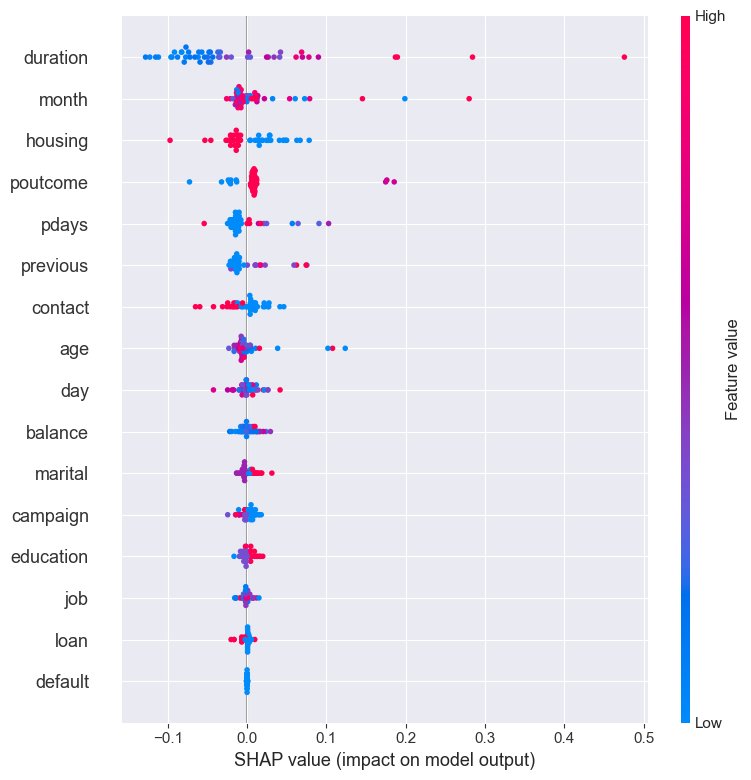

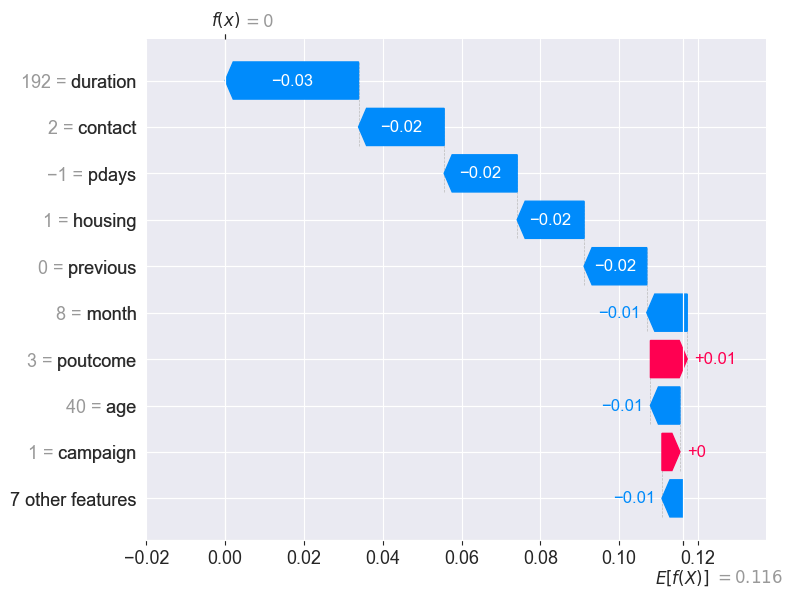

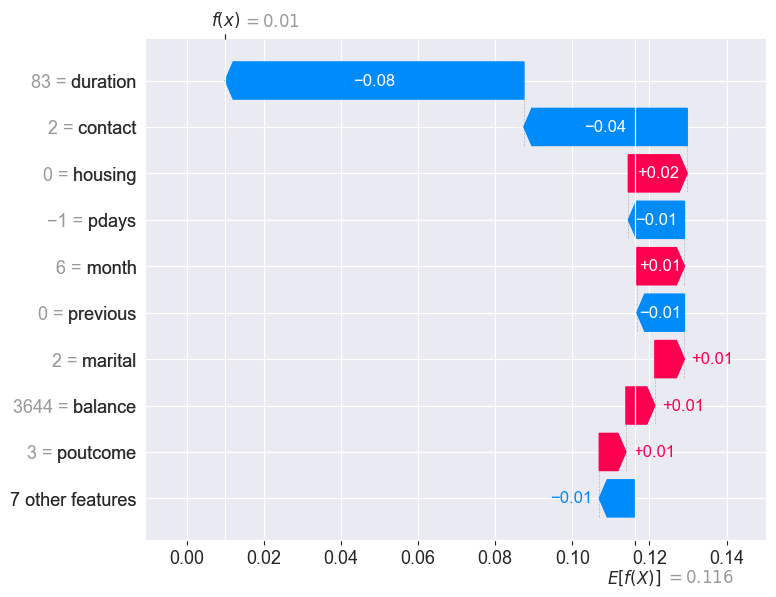

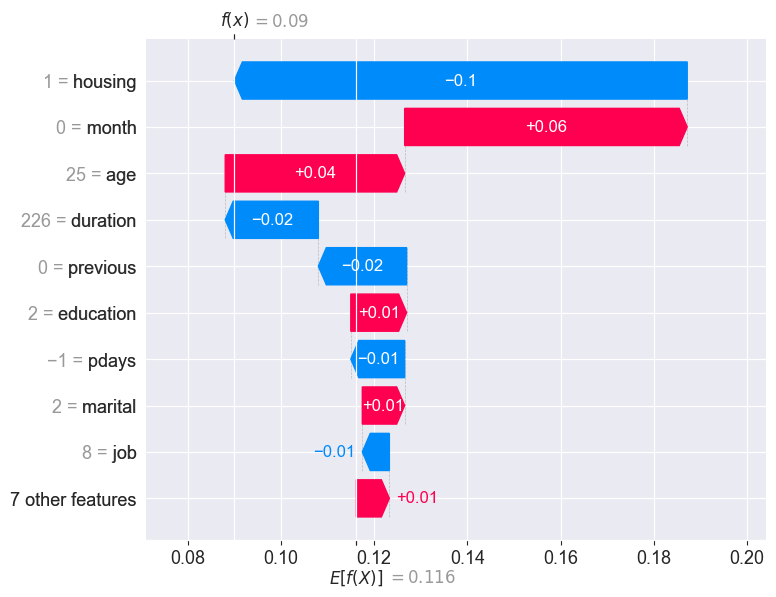

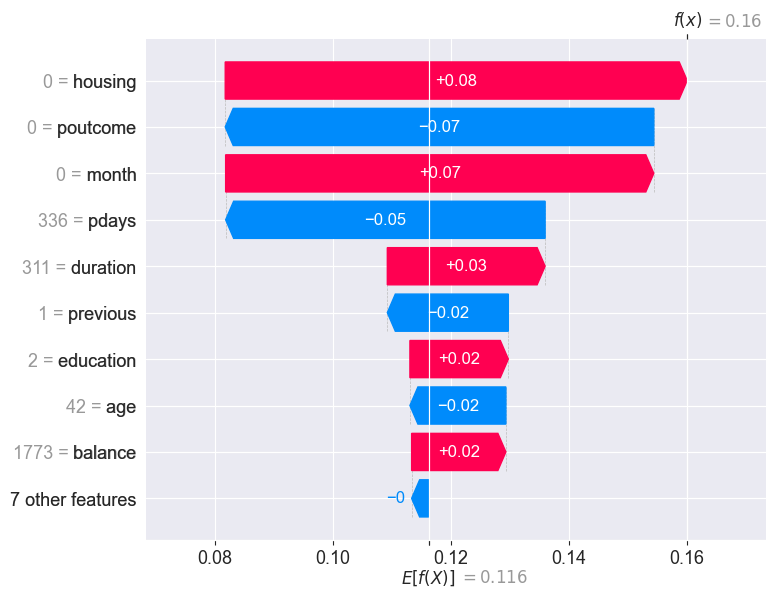

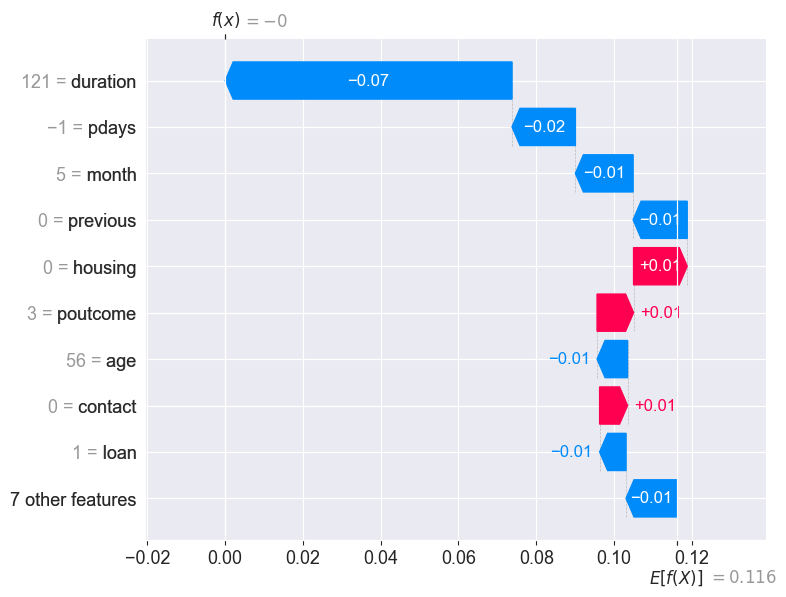

In [18]:
# SHAP is computationally expensive on large datasets
# Therefore, we use a sample of 50 rows for faster explanation
import shap

explainer = shap.TreeExplainer(rf_model)

# Use small sample
X_sample = X_test.iloc[:50]
shap_values = explainer(X_sample)

# Summary plot (subscribed class)
shap.summary_plot(shap_values.values[:, :, 1], X_sample)

# First 5 explanations
for i in range(5):
    shap.plots.waterfall(shap_values[i, :, 1])

## 13. Results and Insights

Random Forest performed better than Logistic Regression in terms of accuracy and F1-score.

Duration of contact and previous campaign outcome were strong predictors of subscription.

SHAP analysis showed that longer call duration increases subscription probability.

## 14. Conclusion

In this project, we built machine learning models to predict whether a customer will subscribe to a term deposit based on marketing campaign data. After preprocessing and feature encoding, two classification models were trained and evaluated.

The Random Forest model achieved better performance and provided more reliable predictions. Explainable AI techniques such as SHAP helped interpret the model’s decisions and highlighted the most influential features.

This solution can help banks optimize marketing campaigns by targeting customers with higher conversion probability, reducing costs, and improving overall efficiency.

## 15. Future Improvements

Hyperparameter tuning for better accuracy

Try XGBoost for improved performance

Handle class imbalance using SMOTE

Deploy model using Streamlit